# Student Performance Predictor 🎓

This project aims to **analyze student performance data** and build a predictive model that estimates a student's expected performance based on their study habits, prior scores, sleep patterns, practice frequency, and participation in extracurricular activities.

The objectives of this project are:  
1. Perform **Exploratory Data Analysis (EDA)** to uncover trends and patterns in the dataset.  
2. Apply **feature engineering and preprocessing** to prepare the data for modeling.  
3. Build **predictive models** (e.g., Linear Regression, Random Forest) to estimate student performance.  
4. Create a **demo function** allowing user input to predict student performance.  
5. Highlight **key insights** that could be useful for educational decision-making and intervention.

**Dataset:**  
- Source: Kaggle (https://www.kaggle.com/datasets/neurocipher/student-performance)  
- Contains 10,000 student records with features such as:  
  - Hours studied  
  - Previous scores  
  - Extracurricular activities  
  - Sleep hours  
  - Number of sample question papers practiced  
  - Performance Index (target variable)

## Load Libraries

In [1]:
!pip install -q kaggle

# Load libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load libraries for ML models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set(style="whitegrid")

## Load dataset

In [2]:
import os
import pandas as pd

# Default local path
dataset_path = "data/student_performance.csv"

if os.path.exists(dataset_path):
    # Local run
    dataset = pd.read_csv(dataset_path)
    print("Loaded dataset from local path")
else:
    # Colab run (manual upload)
    try:
        from google.colab import files
        print("Please upload the CSV file")
        uploaded = files.upload()  # prompts user to upload
        dataset = pd.read_csv(list(uploaded.keys())[0])
        print("Dataset loaded successfully via Colab upload!")
    except ImportError:
        raise Exception("Dataset not found. Please place the CSV in 'data/' folder or run in Colab and upload it.")

# Quick check
dataset.head()
dataset.info()
dataset.describe()


Please upload the CSV file


Saving StudentPerformance.csv to StudentPerformance.csv
Dataset loaded successfully via Colab upload!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Clean & Standardize Column Names

In [3]:
# Remove spaces and make lowercase
dataset.columns = [col.strip().lower().replace(' ', '_') for col in dataset.columns]
dataset.head()


,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Exploratory Data Analaysis (EDA)

### Numeric Features

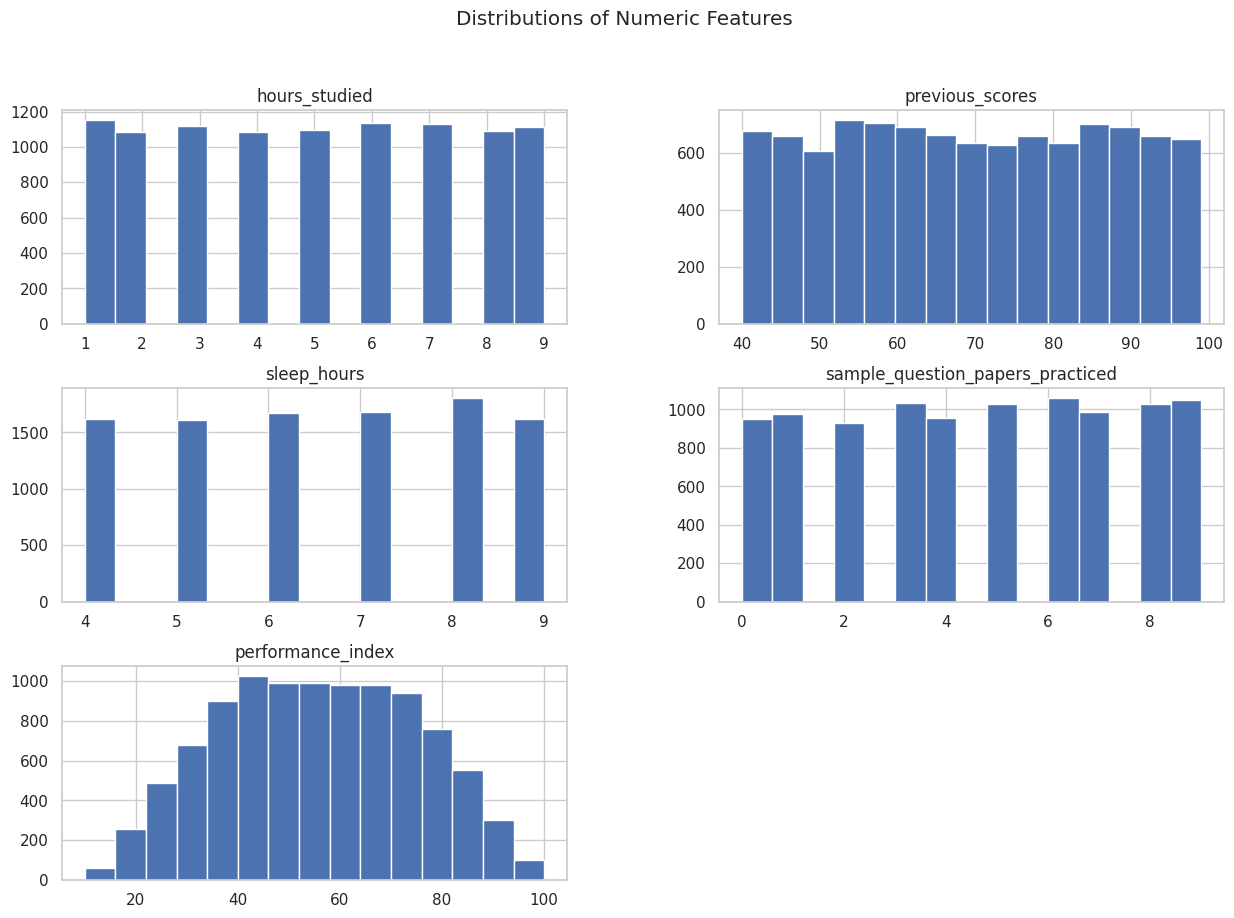

In [4]:
numeric_cols = ['hours_studied', 'previous_scores', 'sleep_hours', 'sample_question_papers_practiced', 'performance_index']

# Histograms
dataset[numeric_cols].hist(bins=15, figsize=(15,10))
plt.suptitle("Distributions of Numeric Features")
plt.show()


### Categorical Features

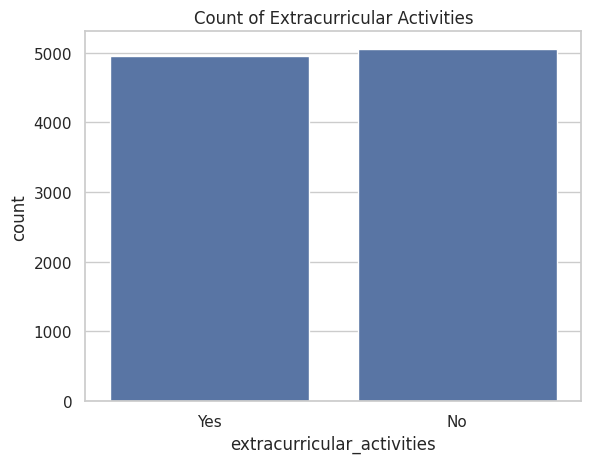

In [5]:
# Example: Extracurricular Activities
sns.countplot(x='extracurricular_activities', data=dataset)
plt.title("Count of Extracurricular Activities")
plt.show()


### Correlations

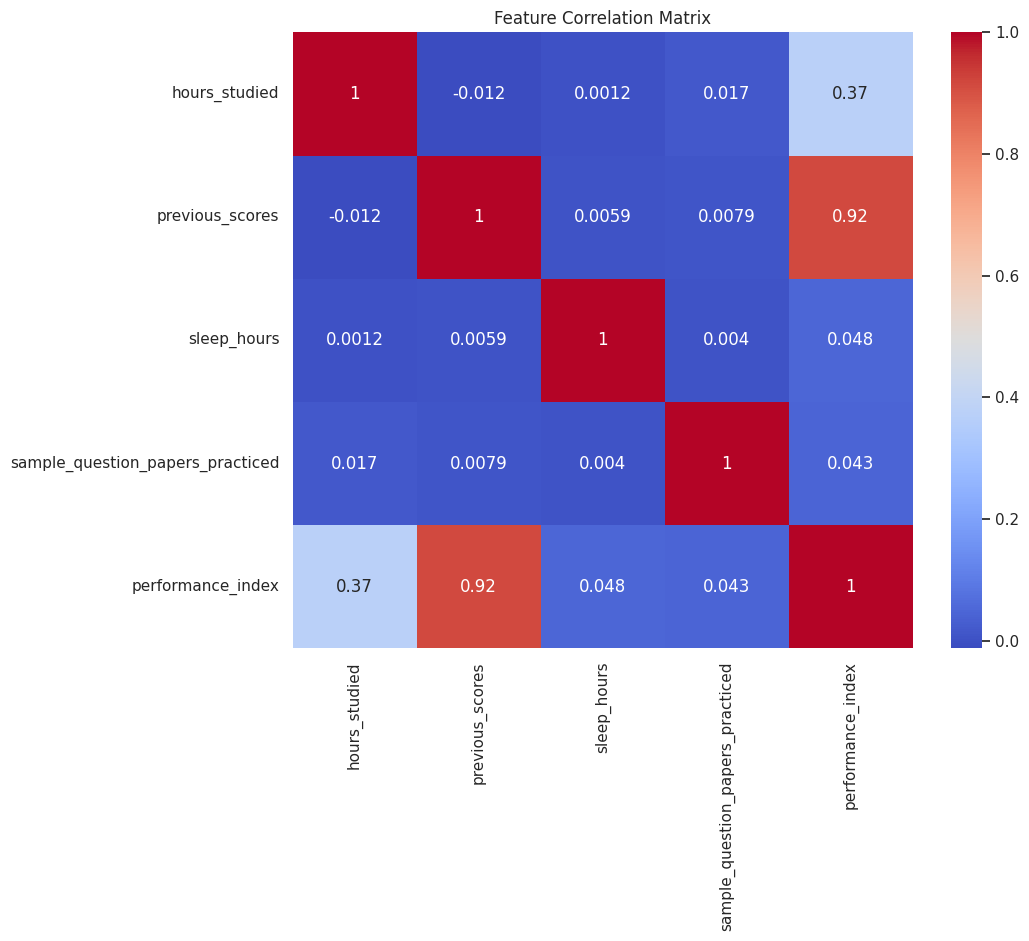

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


### Scatter plots for relationships

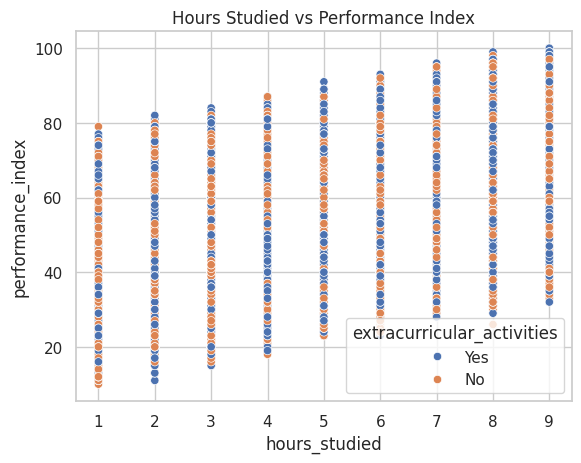

In [7]:
# Hours Studied vs Performance
sns.scatterplot(data=dataset, x='hours_studied', y='performance_index', hue='extracurricular_activities')
plt.title("Hours Studied vs Performance Index")
plt.show()


## Feature Engineering

In [13]:
print(dataset.columns.tolist())
print(dataset.dtypes)


['hours_studied', 'previous_scores', 'sleep_hours', 'sample_question_papers_practiced', 'performance_index', 'extracurricular_activities_yes']
hours_studied                         int64
previous_scores                       int64
sleep_hours                           int64
sample_question_papers_practiced      int64
performance_index                   float64
extracurricular_activities_yes         bool
dtype: object


In [14]:
# Features & target
X = dataset.drop('performance_index', axis=1)
y = dataset['performance_index']



## Train/Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Models

In [16]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Metrics:
RMSE: 2.020551508505005
MAE: 1.611121346312304
R2 Score: 0.9889832909573145


In [17]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Metrics:
RMSE: 2.271287498611829
MAE: 1.814741986111111
R2 Score: 0.9860794546822804


### Results Interpretation
Linear Regression outperformed Tandom Forest, which suggests that student performance in the dataset follows a largely linear pattern. Features like previous scores and hours studied showed the strongest positive influence on predicted performance.

In [18]:
# Coefficient interpretations to know which factors most strongly impact performance
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
0,hours_studied,2.852484
1,previous_scores,1.016988
4,extracurricular_activities_yes,0.608617
2,sleep_hours,0.476941
3,sample_question_papers_practiced,0.191831


## User-Input Demo

In [20]:
def predict_student_score(hours_studied, previous_scores, sleep_hours, sample_question_papers_practiced, extracurricular_activities):
    # Prepare input
    input_df = pd.DataFrame({
        'hours_studied': [hours_studied],
        'previous_scores': [previous_scores],
        'sleep_hours': [sleep_hours],
        'sample_question_papers_practiced': [sample_question_papers_practiced],
        'extracurricular_activities_yes': [1 if extracurricular_activities=='Yes' else 0]  # adjust based on your encoding
    })
    # Predict
    predicted_score = lr_model.predict(input_df)
    return predicted_score[0]

# Example
predict_student_score(6, 70, 7, 5, 'Yes')


np.float64(59.288495566247356)